# Assignment 3: Greek Parliament Proceedings


---

> Artemis Doumeni, 8170027 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8170027@aueb.gr

The report uses a dataset containing Greek Parliament proceedings, available at https://zenodo.org/record/2587904. The dataset description is available at Zenodo and can be found here.

*Some Input and Output numbers may not align as they were pased from a different notebook*

## Part 1: Data Exploration

Import necessary libraries

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from collections import Counter

Load proceedings dataframe

In [2]:
dtypes = {'member_name': 'str', 'sitting_date': 'str', 'parliamentary_period': 'str', 'parliamentary_session': 'str',
         'parliamentary_sitting': 'str', 'political_party': 'str', 'speaker_info': 'str', 'speech': 'str'}
parse_dates = ['sitting_date']
proceedings = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv', parse_dates=parse_dates)
proceedings['sitting_date'] = pd.to_datetime(proceedings['sitting_date'],format = "%Y-%mm-%dd")

Show number of speeches per party

In [3]:
counter = Counter(proceedings['political_party'])
counter.most_common()

Counter({'πανελληνιο σοσιαλιστικο κινημα': 377684,
         'βουλη': 45876,
         'νεα δημοκρατια': 385640,
         'κομμουνιστικο κομμα ελλαδας εσωτερικου': 202,
         'κομμουνιστικο κομμα ελλαδας': 78631,
         'συνασπισμος της αριστερας των κινηματων και της οικολογιας': 35891,
         nan: 162,
         'λαικος ορθοδοξος συναγερμος': 23686,
         'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)': 307,
         'ανεξαρτητοι (εκτος κομματος)': 29951,
         'δημοκρατικη ανανεωση': 6,
         'αντιπολιτευση': 11,
         'πολιτικη ανοιξη': 3384,
         'δημοκρατικο κοινωνικο κινημα': 6056,
         'συνασπισμος ριζοσπαστικης αριστερας': 126572,
         'δημοκρατικη αριστερα': 4204,
         'ανεξαρτητοι ελληνες - πανος καμμενος': 13785,
         'ανεξαρτητοι δημοκρατικοι βουλευτες': 1769,
         'λαικος συνδεσος - χρυση αυγη': 14172,
         'το ποταμι': 7672,
         'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια': 5521,
 

We see that "βουλη" and "αντιπολίτευση" are considered parties something that will hinder our analysis going forward. The actual parties with the most speeches are "πανελληνιο σοσιαλιστικο κινημα" and "νεα δημοκρατια", which was expected.

Drop rows with nan party or party tagged as "βουλη" and "αντιπολιτευση"

In [3]:
proceedings.dropna(subset=['political_party'], inplace = True)
proceedings = proceedings.drop(proceedings[proceedings.political_party == 'βουλη'].index)
proceedings = proceedings.drop(proceedings[proceedings.political_party == 'αντιπολιτευση'].index)

Drop rows with nan and very small speeches ( number of words under 10)

In [4]:
proceedings.dropna(subset=['speech'], inplace = True)
proceedings = proceedings.drop(proceedings[proceedings.speech == '...'].index)

Now the total number of speeches and the speeches per party have been reduced

In [6]:
print("Total number of speeches: ", len(proceedings))

Total number of speeches:  1147551


In [5]:
counter = Counter(proceedings['political_party'])
counter.most_common()

[('νεα δημοκρατια', 385355),
 ('πανελληνιο σοσιαλιστικο κινημα', 377294),
 ('συνασπισμος ριζοσπαστικης αριστερας', 126568),
 ('κομμουνιστικο κομμα ελλαδας', 78611),
 ('συνασπισμος της αριστερας των κινηματων και της οικολογιας', 35860),
 ('ανεξαρτητοι (εκτος κομματος)', 29905),
 ('λαικος ορθοδοξος συναγερμος', 23686),
 ('δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
  22990),
 ('λαικος συνδεσος - χρυση αυγη', 14170),
 ('ανεξαρτητοι ελληνες - πανος καμμενος', 13785),
 ('ενωση κεντρωων', 9888),
 ('το ποταμι', 7672),
 ('δημοκρατικο κοινωνικο κινημα', 6029),
 ('ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια', 5520),
 ('δημοκρατικη αριστερα', 4204),
 ('πολιτικη ανοιξη', 3384),
 ('ανεξαρτητοι δημοκρατικοι βουλευτες', 1769),
 ('λαικη ενοτητα', 346),
 ('οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
  307),
 ('κομμουνιστικο κομμα ελλαδας εσωτερικου', 202),
 ('δημοκρατικη ανανεωση', 6)]

Parties represented in the data

In [6]:
proceedings.political_party.nunique()

21

Let's further explore the number od speeches per party

Text(0, 0.5, 'Count of Speeches')

<Figure size 1296x576 with 0 Axes>

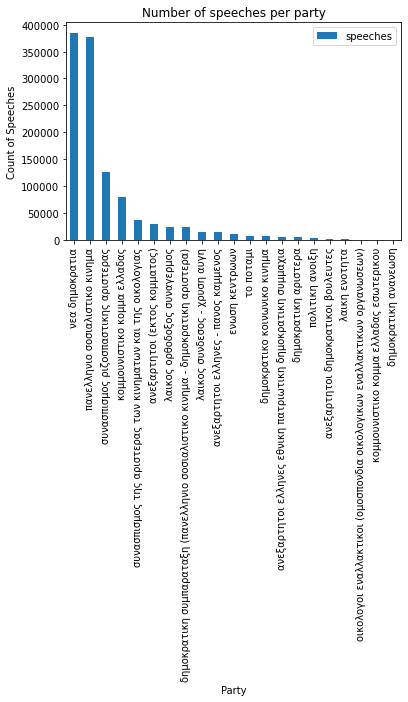

In [8]:
sp_by_party = proceedings.groupby(['political_party']).size().reset_index(name='speeches')
sp_by_party.sort_values(by=['speeches'], ascending=False, inplace = True)
sp_by_party.set_index('political_party', inplace = True)
sp_by_party

plt.figure(figsize=(18,8))
ax1 = sp_by_party.plot(kind='bar')
ax1.set_xticklabels(sp_by_party.index)
ax1.set_title('Number of speeches per party')
ax1.set_xlabel('Party')
ax1.set_ylabel('Count of Speeches')

We see that the top two parties by number of speeches are "νεα δημοκρατια" and "πανελληνιο σοσιαλιστικο κινημα", a fact that attests to the bipartisanship that characterizes the greek political sceen. The following two parites -"συνασπισμος ριζοσπαστικης αριστερας" and "κουμμουνιστικο κομμα ελλαδας"- follow in a great distance while the speeches of rest of the parties are practically non-existent. <br>
We can safely say that out data is not balaced. We will explore ways to manage that later on.

Now let's see how the speeches are distributed through time

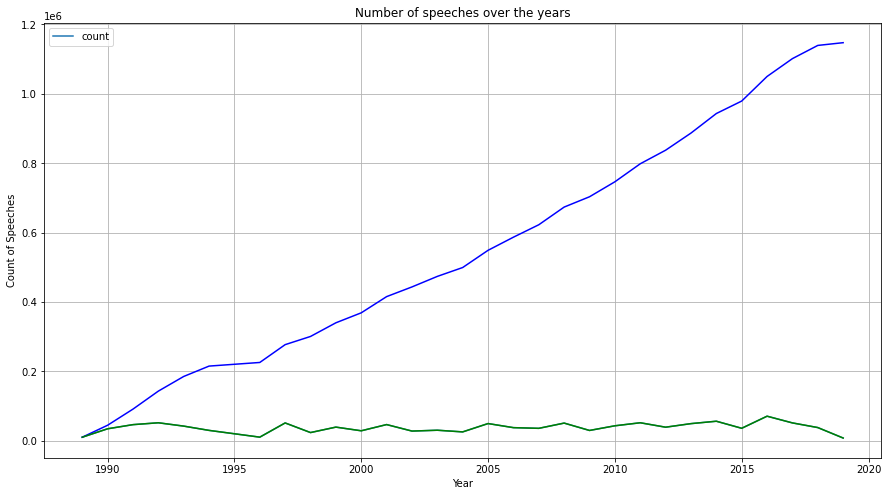

In [9]:
sp_by_year = proceedings['sitting_date'].groupby([proceedings['sitting_date'].dt.year]).agg({'count'})
ax = sp_by_year.plot.line(figsize = (15,8))
ax.set_title('Number of speeches over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Speeches')
ax.grid(b=None, which='major', axis='both')

sp_by_year['cumulative'] = np.cumsum(sp_by_year['count'])

plt.plot(sp_by_year.index, sp_by_year['cumulative'], c='blue', label='cumulative speeches/year')
plt.plot(sp_by_year.index, sp_by_year['count'], c='green', label='speeches/year')

plt.show()

We can see that the greatest amount of speeches happend after 2000 (about 40000 speeches). This could be usefull if we need to take a subset of the dataset.

Let's now focus on the top 3 parties

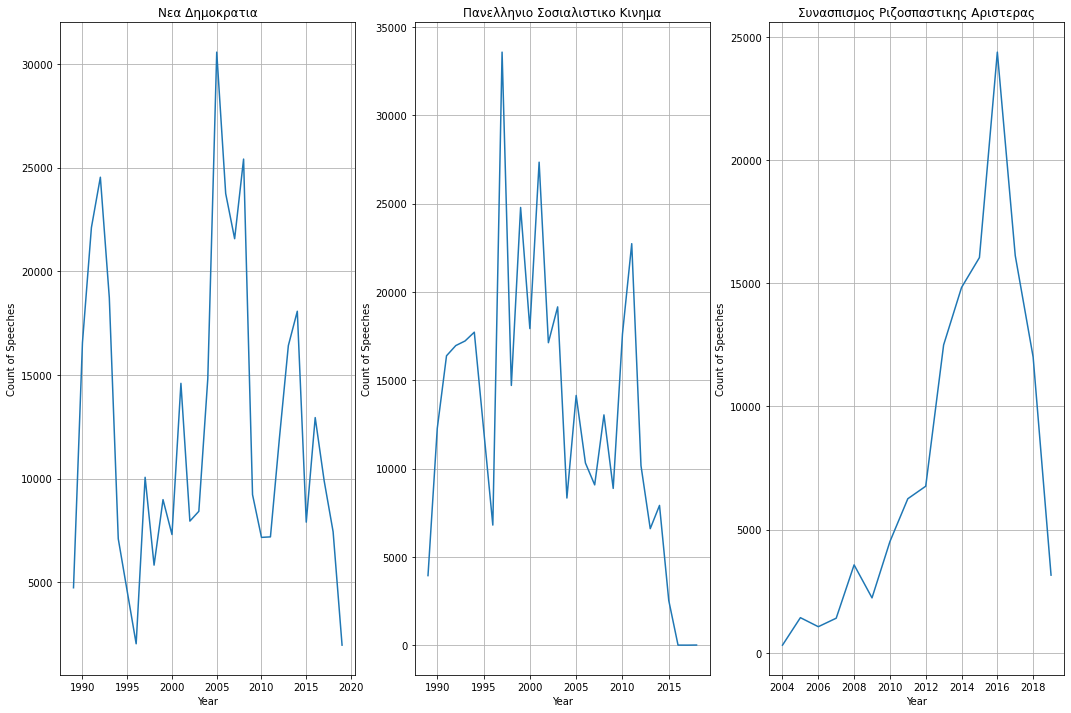

In [10]:
sp_by_year_per_p = proceedings.groupby([proceedings['sitting_date'].dt.year, 'political_party']).size().reset_index(name='counts')
sp_by_year_per_p = sp_by_year_per_p.sort_values(["sitting_date", "counts"], ascending = (True, False))
sp_by_year_per_p.set_index('sitting_date', inplace = True)
nd =  pd.DataFrame(data=sp_by_year_per_p.loc[sp_by_year_per_p['political_party'] == 'νεα δημοκρατια'])
pasok =  pd.DataFrame(data=sp_by_year_per_p.loc[sp_by_year_per_p['political_party'] == 'πανελληνιο σοσιαλιστικο κινημα'])
siriza =  pd.DataFrame(data=sp_by_year_per_p.loc[sp_by_year_per_p['political_party'] == 'συνασπισμος ριζοσπαστικης αριστερας'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,12))

ax1.plot(nd.index, nd.counts)
ax1.set_title('Νεα Δημοκρατια')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Speeches')
ax1.grid(b=None, which='major', axis='both')

ax2.plot(pasok.index, pasok.counts)
ax2.set_title('Πανελληνιο Σοσιαλιστικο Κινημα')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count of Speeches')
ax2.grid(b=None, which='major', axis='both')

ax3.plot(siriza.index, siriza.counts)
ax3.set_title('Συνασπισμος Ριζοσπαστικης Αριστερας')
ax3.set_xlabel('Year')
ax3.set_ylabel('Count of Speeches')
ax3.grid(b=None, which='major', axis='both')

We can see than "Νεα δημοκρατια" and "Πανελληνιο Σοσιαλιστικο Κινημα" speeches drop after 2010 while "Συνασπισμος Ριζοσπαστικης Αριστερας" rizes. This is expected should we consider the political and social changes of the time.

## Part 2: Machine Learning Algorithms

In this report 2 different algorithms are implemented:
* *SGD*: according to [scikit-learn](https://scikit-learn.org/stable/modules/sgd.html) documentation it has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing.
* *Decision Tree*: in hindight it probably wasn't the best choice of classifier as it did not yield hight scores. 
* *Random Forest Classifier*: after implementing the Decision Tree we tried to imrove the score by using a forest. Accuracy was slightly increased but should we had run a grid search we could have chosen more appropriate hyperparameters.
<br> 

*SVM*: after some reaserch we concluded that SVM is one of the most popular classifiers for text classification in python, therefore we thought that its implementation would be interesting. We starded with a grid search which even 4 days later had not been executed. The code for the grid search is displayed at the end of Part 2.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
-> from imblearn.over_sampling import RandomOverSampler
-> from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
-> from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.dummy import DummyClassifier
-> from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

### Pre-processing
After trying different approaches and combinations we concluded that:
* Removing punctuation has little to no effect
* Making all letters lower case has little to no effect
* Removing small speeches (< 10 word) has a great effect on accuracy, precision, recall and f1-score (removing speeches with <5 words yields similar -slightly worse- scores and excludes a lot less records, but due to computational resource management we chose to only include speeches with more than 10 words)
* Removing leading and trailing spaces has a mediocre effect on accuracy

In [12]:
proceedings_p2 = proceedings[['speech', 'political_party']]
proceedings_p2 = proceedings_p2[~proceedings['speech'].str.split().str.len().lt(10)]
proceedings_p2['speech'] = proceedings_p2['speech'].str.strip()
#proceedings_p2["speech"] = proceedings_p2["speech"].str.replace('[^\w\s]','')
#proceedings_p2['speech'] = proceedings_p2['speech'].str.lower()
len(proceedings_p2)

657445

Firstly, we split the dataset

In [14]:
X, y = (proceedings_p2['speech'], 
        proceedings_p2['political_party'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=33,
                                                   shuffle=True)

We implement a DummyClassifier for reference

**Dummy Classifier**

In [15]:
dummy_clf = Pipeline([('vect', CountVectorizer()),
                    ('clf', 
                     DummyClassifier(strategy='most_frequent'))
                    ])
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, y_pred_dummy)

0.353110816368747

In [17]:
print(classification_report(y_test, y_pred_dummy))

C:\Users\artem\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.00      0.00      0.00      3747
                                             ανεξαρτητοι δημοκρατικοι βουλευτες       0.00      0.00      0.00       247
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.00      0.00      0.00      1879
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.00      0.00      0.00       603
                                                           δημοκρατικη αριστερα       0.00      0.00      0.00       592
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.00      0.00      0.00      2602
                                                   δημοκρατικο κοινωνικο κινημα       0.00      0.00      0.00       921
                               

### Stochastic Gradient Descent Classification

Grid search was not implemented due to lack of computational resourses. Different combinations of hyperparameters were tested to find the best result. We found that:
* TFIDF transformer is not usefull,
* Balancing with RandomOverSampler and RandomUnderSampler did not yield the desired results

Independent of the grid search we found that the SDG Classifier works best without tfidf

**SDG without TFIDF Transformer**

In [18]:
clf = Pipeline([
        ('vect', CountVectorizer()),
        ('linear_model', 
         SGDClassifier(alpha=0.0001, random_state=42, loss = 'hinge'))
    ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.5226755576106399

In [20]:
print(classification_report(y_test, y_pred))

C:\Users\artem\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.24      0.04      0.07      3747
                                             ανεξαρτητοι δημοκρατικοι βουλευτες       1.00      0.00      0.01       247
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.39      0.11      0.18      1879
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.54      0.21      0.30       603
                                                           δημοκρατικη ανανεωση       0.00      0.00      0.00         0
                                                           δημοκρατικη αριστερα       0.69      0.31      0.43       592
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.42      0.20      0.27      2602
                               

TFIDF yields sloghtly worse scores than a simple CountVectorizer. 

**SDG with TFIDF Transformer**

In [21]:
clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('linear_model', 
         SGDClassifier(alpha=0.0001, random_state=42, loss = 'hinge'))
    ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5178995144863168

In [22]:
print(classification_report(y_test, y_pred))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.10      0.01      0.02      3747
                                             ανεξαρτητοι δημοκρατικοι βουλευτες       0.02      0.01      0.01       247
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.28      0.03      0.05      1879
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.32      0.06      0.10       603
                                                           δημοκρατικη ανανεωση       0.00      0.00      0.00         0
                                                           δημοκρατικη αριστερα       0.41      0.11      0.18       592
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.25      0.12      0.16      2602
                               

Seeing as our dataset is unbalanced we will try to balance it. We use two different approaches (RandomOverSampler, RandomUnderSampler) but neither yield good results. It is possible that SMOTE could have provided better results but is not attemted here.

**RandomOverSampler**

In [23]:
imb_sgd= make_pipeline_imb(CountVectorizer(),
                           RandomOverSampler(),
                           SGDClassifier(alpha=0.0001, random_state=42, loss = 'hinge'))

imb_sgd.fit(X_train, y_train)
y_pred_over = imb_sgd.predict(X_test)

In [24]:
metrics.accuracy_score(y_test, y_pred_over)

0.37745342597437365

The accuracy is very similar to that of the DummyClassifier, therefore the algorith is rejected

**RandomUnderSampler**

In [34]:
imb_sgd_u= make_pipeline_imb(CountVectorizer(),
                           RandomUnderSampler(),
                           SGDClassifier(alpha=0.0001, random_state=42, loss = 'hinge'))

imb_sgd_u.fit(X_train, y_train)
y_pred_under = imb_sgd_u.predict(X_test)

In [36]:
metrics.accuracy_score(y_test, y_pred_under)

0.0639624730777187

The accuracy is very lower than that of the DummyClassifier, therefore the algorith is rejected

We see that some parties have very small support (under 300). We go ahead and remove them. This should also handle the zero-division warning we were getting.

In [37]:
proceedings_p2 = proceedings_p2.drop(proceedings[proceedings.political_party == 'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)'].index)
proceedings_p2 = proceedings_p2.drop(proceedings[proceedings.political_party == 'λαικη ενοτητα'].index)
proceedings_p2 = proceedings_p2.drop(proceedings[proceedings.political_party == 'κομμουνιστικο κομμα ελλαδας εσωτερικου'].index)
proceedings_p2 = proceedings_p2.drop(proceedings[proceedings.political_party == 'δημοκρατικη ανανεωση'].index)
proceedings_p2 = proceedings_p2.drop(proceedings[proceedings.political_party == 'ανεξαρτητοι δημοκρατικοι βουλευτες'].index)

We will split the dataset again and re-implement the SGD model without tfidf transformer

In [38]:
X, y = (proceedings_p2['speech'], 
        proceedings_p2['political_party'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=33,
                                                   shuffle=True)

We will implement our best algorith on this new dataset.

**SDG without TFIDF Transformer, less parties**

In [39]:
clf = Pipeline([
        ('vect', CountVectorizer()),
        ('linear_model', 
         SGDClassifier(alpha=0.0001, random_state=42, loss = 'hinge'))
    ])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
metrics.accuracy_score(y_test, y_pred)

0.5459429791126696

In [41]:
print(classification_report(y_test, y_pred))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.24      0.05      0.09      3666
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.50      0.07      0.12      1923
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.67      0.07      0.13       620
                                                           δημοκρατικη αριστερα       0.35      0.42      0.39       611
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.43      0.20      0.27      2544
                                                   δημοκρατικο κοινωνικο κινημα       0.90      0.22      0.35       998
                                                                 ενωση κεντρωων       0.79      0.14      0.23       932
                               

Even thought the accuracy is not great, it is **57% grater than that of the dummy classifier**. Therefore we can say that the model is satisfying enough.

Going forward we assume that the preprocessing is suitable for the other two algorithms and that over and under sampling is not useful. We also keep the 5 parties with small support out of our analysis (very few speeches are produced by them either way).

### Decision Tree Classification

We perform a grid search in order to determine the most appropriate hyperparameters. <br>
Unfortunately, due to limited computational resources, we searched for a small number of parameters and used a subset of 300,000 records.

In [4]:
proceedings_p2 = proceedings_p2.tail(300000)

In [5]:
X1, y1 = (proceedings_p2['speech'], 
        proceedings_p2['political_party'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size=0.25, 
                                                    random_state=33,
                                                   shuffle=True)

In [6]:
clf_tree = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', 
         DecisionTreeClassifier(random_state=42))
    ])
clf_tree.fit(X_train1, y_train1)
parameters = [
  {'model__max_depth': list(range(12, 15)),
   'model__criterion': ['entropy', 'gini'],
   'tfidf__use_idf':  (True, False)
  }]

cv = KFold(n_splits=3, shuffle=True, random_state=13)
grid_clf = GridSearchCV(clf_tree, parameters, cv=cv)

grid_clf = grid_clf.fit(X_train1, y_train1)
print(grid_clf.best_estimator_)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=False)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=14,
                                        max_features=None, max_leaf_nodes=None,
             

Using criterion = 'gini', max depth 14 and no tfidf transformer, as shown by the grid search, we get the following results

In [9]:
clf_tree = Pipeline([
        ('vect', CountVectorizer()),
        ('model', 
         DecisionTreeClassifier(random_state=42, max_depth = 14, criterion = 'gini'))
    ])
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.42327184021954567

In [11]:
print(classification_report(y_test, y_pred))

C:\Users\Kelly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.49      0.04      0.08      3666
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.44      0.04      0.07      1923
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.41      0.06      0.11       620
                                                           δημοκρατικη αριστερα       0.63      0.08      0.14       611
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.47      0.10      0.16      2544
                                                   δημοκρατικο κοινωνικο κινημα       0.71      0.01      0.02       998
                                                                 ενωση κεντρωων       0.50      0.15      0.23       932
                               

To compare, we also used a classifier with criterion = entropy and a tfidf transformer. Accuracy was very slightly worse. 

In [30]:
clf_for = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', 
         DecisionTreeClassifier(criterion = 'entropy', max_depth = 14, random_state=42))
    ])
clf_for.fit(X_train, y_train)
y_pred = clf_for.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.42257051379783506

In [33]:
print(classification_report(y_test, y_pred))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.40      0.04      0.07      3666
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.38      0.05      0.09      1923
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.36      0.10      0.15       620
                                                           δημοκρατικη αριστερα       0.64      0.08      0.15       611
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.51      0.09      0.16      2544
                                                   δημοκρατικο κοινωνικο κινημα       0.70      0.02      0.03       998
                                                                 ενωση κεντρωων       0.53      0.17      0.25       932
                               

Accuracy is **22%** lower than that of the SDG Classifier and **20%** greater than that of the DummyClassifier

Thinking that a RamdomForest would improve the results we also implemented that. Indeed we see a very small increase in accuracy.

### Random Forest Classifier

We implemented a Random Forest with 500 estimators, max depth 14 and without tfidf. We tried both gini and entropy criterion, with gini yielding the best results. Should we had run a grid search and chosen more appropriate hyperparameters the results may have been better.

**Random Forest, criterion = gini**

In [16]:
clf_forest = Pipeline([
        ('vect', CountVectorizer()),
        ('model', 
         RandomForestClassifier(n_estimators = 500, random_state=42, max_depth = 14, criterion = 'gini'))
    ])

print(classification_report(y_test, y_pred))
clf_forest.fit(X_train, y_train)
y_pred = clf_forest.predict(X_test)

C:\Users\Kelly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.00      0.00      0.00      3666
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.00      0.00      0.00      1923
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.00      0.00      0.00       620
                                                           δημοκρατικη αριστερα       0.00      0.00      0.00       611
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.00      0.00      0.00      2544
                                                   δημοκρατικο κοινωνικο κινημα       0.00      0.00      0.00       998
                                                                 ενωση κεντρωων       0.00      0.00      0.00       932
                               

In [17]:
metrics.accuracy_score(y_test, y_pred)

0.4402073486812014

**Random Forest, entropy**

In [37]:
>>> from sklearn.ensemble import RandomForestClassifier
clf_for = Pipeline([
        ('vect', CountVectorizer()),
        ('model', 
         RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 14, random_state=42))
    ])
clf_for.fit(X_train, y_train)
y_pred = clf_for.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.42308888550083856

As we said, the best scores were produced using the RandomForestClassifier, with criterion='gini'. Specifically accuraccy is **25%** greater than that of the dummy classifier. However the SDG algorithm surpasses it by about **18%**.

### Support Vector Machines - not implemented

In [ ]:
svm_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', 
         svm.SVC())
    ])
clf.fit(X_train, y_train)
param_grid = {'model__C': [1e3, 5e3, 1e4, 5e4],
              'model__gamma': [0.0001, 0.001, 0.01],
              'model__kernel': ['linear', 'rdf'],
              'tfidf__use_idf': (True, False)}
gr_svm_clf = GridSearchCV(svm_clf, param_grid, cv=3)
gr_svm_clf = gr_svm_clf.fit(X_train, y_train)
gr_svm_clf.best_estimator_

In [ ]:
best_result = gr_svm_clf.best_score_
print(best_result)
print(classification_report(y_test, gr_svm_clf.best_estimator_.predict(X_test)))

## Part 3: Neural Networks

Necessary imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from datetime import datetime
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

import re
import string

We use the standardized clean dataset from **Part 2**, selecting speeches with more than 100 words. Following that, we select a subset of the 200,000 most recent speeches (due to lack of computational resources)

In [ ]:
proceedings_p3_100 = proceedings_p2[~proceedings['speech'].str.split().str.len().lt(100)]

In [9]:
proceedings_p3_100 = proceedings_p3_100.tail(200000)

We create a column *label* that maps the political parties to integers

In [10]:
proceedings_p3_100['label'] = le.fit_transform(proceedings_p3_100.political_party)

We have 15 unique parties with their respective labels. 

In [11]:
proceedings_p3_100.political_party.nunique()

15

In [12]:
proceedings_p3_100.label.nunique()

15

We go ahead and split the dataset as shown below:
* 25% test
* 60% training
* 15% validation 

In [ ]:
X,y = proceedings_p3_100.speech.values, proceedings_p3_100.label.values,
train, test, train_lables, test_lables = train_test_split( X, y, test_size=0.25, random_state=42)
train, val, train_lables, val_lables = train_test_split( train, train_lables, test_size=0.2, random_state=42))

In [30]:
print("train shape: ", train.shape, " labels shape: ", train_lables.shape)
print("validation shape: ", val.shape, " labels shape: ", val_lables.shape)
print("test shape: ", test.shape, " labels shape: ", test_lables.shape)

train shape:  (120000,)  labels shape:  (120000,)
validation shape:  (30000,)  labels shape:  (30000,)
test shape:  (50000,)  labels shape:  (50000,)


We further standardize the data by removing punctuation and turning all letters to lower caps

In [ ]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    return tf.strings.regex_replace(lowercase,
                                    '[%s]' % re.escape(string.punctuation),
                                    ' ')

We use 10000 as the vocabulary size and 500 as the sequence lenght

In [23]:
vocab_size = 10000
sequence_length = 500

# Use the text vectorization layer to normalize, split, and map strings to  
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    input_shape=(1,),
    output_mode='int')

In [24]:
vectorize_layer.adapt(train)

We used two types of neural networks, one of them being an RNNs network.

### Network #1
* embedding layer: turning int encoding to vectors
* `Dropout` layer: handling overfitting
* `GlobalAveragePooling1D` layer: verages all word embeddings of a review to produce a single average embedding, which we can think as "summarizing" or "distilling" the meaning of the review.

Build the model

In [23]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(15)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 15)                975       
Total params: 640,975
Trainable params: 640,975
Non-trainable params: 0
_________________________________________________________________


We use an adam optimizer and SparseCategoricalCrossentropy loss (we have more than two classes in the form of integers) to compile the model. 

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Untrained model for reference**

In [25]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 20s 13ms/step - loss: 2.7091 - accuracy: 0.0228
Loss:  2.7091469764709473
Accuracy:  0.02181999944150448


In [26]:
predictions = model.predict(test)

In [27]:
print(classification_report( test_lables, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1517
           1       0.01      0.19      0.02       449
           2       0.00      0.00      0.00       260
           3       0.01      0.09      0.01       432
           4       0.01      0.00      0.01       915
           5       0.01      0.00      0.00       545
           6       0.00      0.10      0.01       288
           7       0.06      0.00      0.00      3757
           8       0.04      0.45      0.07      1551
           9       0.02      0.05      0.02       752
          10       0.26      0.00      0.01     15709
          11       0.32      0.01      0.01     16508
          12       0.10      0.00      0.00      6176
          13       0.01      0.02      0.02       902
          14       0.02      0.02      0.02       239

    accuracy                           0.02     50000
   macro avg       0.06      0.06      0.01     50000
weighted avg       0.21   

The first goal of our model is to do better than the untrained one.

We define batch_size = 16 and epochs = 15. However the training stops after 11 epochs as the val_loss keeps reducing.

**Batch_size= 16, epochs = 15**

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

epochs = 15
batch_size= 16
history = model.fit(
    train, train_lables,
    validation_data= (val ,val_lables),
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stop])

Epoch 1/15
7500/7500 [==============================] - 131s 17ms/step - loss: 1.7557 - accuracy: 0.3944 - val_loss: 1.3226 - val_accuracy: 0.5592
Epoch 2/15
7500/7500 [==============================] - 125s 17ms/step - loss: 1.2465 - accuracy: 0.5909 - val_loss: 1.1486 - val_accuracy: 0.6131
Epoch 3/15
7500/7500 [==============================] - 129s 17ms/step - loss: 1.0612 - accuracy: 0.6458 - val_loss: 1.0706 - val_accuracy: 0.6352
Epoch 4/15
7500/7500 [==============================] - 126s 17ms/step - loss: 0.9604 - accuracy: 0.6762 - val_loss: 1.0321 - val_accuracy: 0.6487
Epoch 5/15
7500/7500 [==============================] - 126s 17ms/step - loss: 0.8879 - accuracy: 0.6988 - val_loss: 1.0144 - val_accuracy: 0.6553
Epoch 6/15
7500/7500 [==============================] - 125s 17ms/step - loss: 0.8394 - accuracy: 0.7103 - val_loss: 1.0086 - val_accuracy: 0.6566
Epoch 7/15
7500/7500 [==============================] - 125s 17ms/step - loss: 0.7899 - accuracy: 0.7281 - val_loss: 1

The model yields the following scores. <br>

In [26]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 20s 13ms/step - loss: 1.0066 - accuracy: 0.6624
Loss:  1.0066428184509277
Accuracy:  0.6623600125312805


In [39]:
from sklearn.metrics import classification_report

print(classification_report( test_lables, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.26      0.09      0.13      1517
           1       0.47      0.13      0.20       449
           2       0.67      0.13      0.22       260
           3       0.60      0.31      0.41       432
           4       0.57      0.36      0.44       915
           5       0.67      0.50      0.58       545
           6       0.61      0.31      0.41       288
           7       0.83      0.82      0.82      3757
           8       0.63      0.57      0.60      1551
           9       0.80      0.74      0.76       752
          10       0.65      0.67      0.66     15709
          11       0.68      0.75      0.71     16508
          12       0.60      0.69      0.64      6176
          13       0.61      0.45      0.52       902
          14       0.27      0.03      0.05       239

    accuracy                           0.66     50000
   macro avg       0.59      0.44      0.48     50000
weighted avg       0.65   

It yields far better results than its untrained counterpart. We will try to see if we can do better.

Let's see what happens when we add a layer

**Extra layer**

In [18]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                975       
Total params: 682,319
Trainable params: 682,319
Non-trainable params: 0
________________________________________________

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

epochs = 15
batch_size= 16
history = model.fit(
    train, train_lables,
    validation_data= (val ,val_lables),
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stop])

Epoch 1/15
7500/7500 [==============================] - 532s 70ms/step - loss: 1.7760 - accuracy: 0.3477 - val_loss: 1.4177 - val_accuracy: 0.4718
Epoch 2/15
7500/7500 [==============================] - 528s 70ms/step - loss: 1.3374 - accuracy: 0.5061 - val_loss: 1.2095 - val_accuracy: 0.5755
Epoch 3/15
7500/7500 [==============================] - 521s 69ms/step - loss: 1.0632 - accuracy: 0.6334 - val_loss: 1.0819 - val_accuracy: 0.6290
Epoch 4/15
7500/7500 [==============================] - 521s 69ms/step - loss: 0.8732 - accuracy: 0.7023 - val_loss: 1.0182 - val_accuracy: 0.6454
Epoch 5/15
7500/7500 [==============================] - 520s 69ms/step - loss: 0.7468 - accuracy: 0.7480 - val_loss: 1.0418 - val_accuracy: 0.6491
Epoch 6/15
7500/7500 [==============================] - 521s 70ms/step - loss: 0.6470 - accuracy: 0.7808 - val_loss: 1.0901 - val_accuracy: 0.6520
Epoch 7/15
7500/7500 [==============================] - 520s 69ms/step - loss: 0.5470 - accuracy: 0.8148 - val_loss: 1

In [22]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 65s 41ms/step - loss: 1.0248 - accuracy: 0.6462
Loss:  1.0247915983200073
Accuracy:  0.6461799740791321


In [24]:
predictions = model.predict(test)

In [25]:
from sklearn.metrics import classification_report

print(classification_report( test_lables, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.02      0.04      1517
           1       0.38      0.06      0.11       449
           2       0.23      0.05      0.08       260
           3       0.66      0.28      0.40       432
           4       0.58      0.11      0.19       915
           5       0.53      0.28      0.37       545
           6       0.77      0.35      0.49       288
           7       0.86      0.77      0.82      3757
           8       0.48      0.56      0.52      1551
           9       0.73      0.64      0.68       752
          10       0.60      0.77      0.68     15709
          11       0.75      0.64      0.69     16508
          12       0.54      0.72      0.62      6176
          13       0.52      0.43      0.48       902
          14       0.29      0.03      0.05       239

    accuracy                           0.65     50000
   macro avg       0.55      0.38      0.41     50000
weighted avg       0.65   

Adding another layer seems to very slightly worsen our network.

### Network #2: RNN

For the model we use:
* an Embedding layer, this time with 64 dimentions, 
* an LSTM layer with 64 LSTM cells, 
* a dense layer with relu (rectified linear unit) activation and 
* a dense output layer.

In [25]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                975       
Total params: 678,159
Trainable params: 678,159
Non-trainable params: 0
_________________________________________________________________


In [52]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Untrained model for reference**

In [20]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 72s 41ms/step - loss: 2.7052 - accuracy: 0.1275
Loss:  2.705211877822876
Accuracy:  0.12639999389648438


In [21]:
predictions = model.predict(test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report( test_lables, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.03      0.04      0.03      1517
           1       0.01      0.10      0.01       449
           2       0.00      0.01      0.00       260
           3       0.00      0.01      0.00       432
           4       0.02      0.02      0.02       915
           5       0.00      0.01      0.01       545
           6       0.00      0.00      0.00       288
           7       0.14      0.02      0.03      3757
           8       0.04      0.02      0.03      1551
           9       0.01      0.00      0.00       752
          10       0.32      0.17      0.22     15709
          11       0.35      0.06      0.10     16508
          12       0.13      0.39      0.19      6176
          13       0.01      0.02      0.02       902
          14       0.00      0.08      0.01       239

    accuracy                           0.13     50000
   macro avg       0.07      0.06      0.05     50000
weighted avg       0.24   

**Batch_size = 16, epochs = 15**

We will use a batch size of 16 and 15 epochs. However the model will stop improving on the 7th epoch and the training will terminate.

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

epochs = 15
batch_size= 16
history = model.fit(
    train, train_lables,
    validation_data= (val ,val_lables),
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stop])

Epoch 1/15
7500/7500 [==============================] - 522s 69ms/step - loss: 1.7770 - accuracy: 0.3510 - val_loss: 1.4364 - val_accuracy: 0.4593
Epoch 2/15
7500/7500 [==============================] - 521s 69ms/step - loss: 1.2981 - accuracy: 0.5265 - val_loss: 1.0959 - val_accuracy: 0.6091
Epoch 3/15
7500/7500 [==============================] - 513s 68ms/step - loss: 0.9618 - accuracy: 0.6689 - val_loss: 0.9809 - val_accuracy: 0.6604
Epoch 4/15
7500/7500 [==============================] - 515s 69ms/step - loss: 0.7892 - accuracy: 0.7313 - val_loss: 0.9589 - val_accuracy: 0.6714
Epoch 5/15
7500/7500 [==============================] - 516s 69ms/step - loss: 0.6628 - accuracy: 0.7768 - val_loss: 0.9799 - val_accuracy: 0.6733
Epoch 6/15
7500/7500 [==============================] - 513s 68ms/step - loss: 0.5539 - accuracy: 0.8133 - val_loss: 1.0340 - val_accuracy: 0.6696
Epoch 7/15
7500/7500 [==============================] - 512s 68ms/step - loss: 0.4655 - accuracy: 0.8449 - val_loss: 1

In [ ]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 59s 38ms/step - loss: 1.1272 - accuracy: 0.6386
Loss:  1.1271790266036987
Accuracy:  0.6386200189590454


The model surpasses its untrained counterpart but is not the best we have seen so far (albeit with small differences)

**Batch_size = 32, epochs = 10**

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

epochs = 10
batch_size= 32
history = model.fit(
    train, train_lables,
    validation_data= (val ,val_lables),
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stop])

Epoch 1/10
3750/3750 [==============================] - 349s 91ms/step - loss: 1.7957 - accuracy: 0.3445 - val_loss: 1.7031 - val_accuracy: 0.3803
Epoch 2/10
3750/3750 [==============================] - 341s 91ms/step - loss: 1.6305 - accuracy: 0.4065 - val_loss: 1.3593 - val_accuracy: 0.4891
Epoch 3/10
3750/3750 [==============================] - 340s 91ms/step - loss: 1.2673 - accuracy: 0.5410 - val_loss: 1.1260 - val_accuracy: 0.6039
Epoch 4/10
3750/3750 [==============================] - 339s 91ms/step - loss: 1.0167 - accuracy: 0.6502 - val_loss: 1.0316 - val_accuracy: 0.6434
Epoch 5/10
3750/3750 [==============================] - 340s 91ms/step - loss: 0.8658 - accuracy: 0.7077 - val_loss: 1.0480 - val_accuracy: 0.6533
Epoch 6/10
3750/3750 [==============================] - 341s 91ms/step - loss: 0.7514 - accuracy: 0.7456 - val_loss: 0.9953 - val_accuracy: 0.6681
Epoch 7/10
3750/3750 [==============================] - 340s 91ms/step - loss: 0.6557 - accuracy: 0.7784 - val_loss: 1

In [28]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 59s 38ms/step - loss: 1.0121 - accuracy: 0.6606
Loss:  1.0120649337768555
Accuracy:  0.6606199741363525


**Adding a regulizer**

When using a regulizer we yield similar scores

In [34]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [35]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(15)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                975       
Total params: 678,159
Trainable params: 678,159
Non-trainable params: 0
_________________________________________________________________


In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

epochs = 15
batch_size= 16
history = model.fit(
    train, train_lables,
    validation_data= (val ,val_lables),
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stop])

Epoch 1/15
7500/7500 [==============================] - 518s 69ms/step - loss: 0.7496 - accuracy: 0.7496 - val_loss: 1.0124 - val_accuracy: 0.6583
Epoch 2/15
7500/7500 [==============================] - 511s 68ms/step - loss: 0.6642 - accuracy: 0.7799 - val_loss: 1.0470 - val_accuracy: 0.6637
Epoch 3/15
7500/7500 [==============================] - 514s 68ms/step - loss: 0.5772 - accuracy: 0.8103 - val_loss: 1.1050 - val_accuracy: 0.6589
Epoch 4/15
7500/7500 [==============================] - 517s 69ms/step - loss: 0.4971 - accuracy: 0.8381 - val_loss: 1.2110 - val_accuracy: 0.6581


In [39]:
loss, accuracy = model.evaluate(test, test_lables)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

1563/1563 [==============================] - 66s 42ms/step - loss: 1.0195 - accuracy: 0.6563
Loss:  1.0194916725158691
Accuracy:  0.656279981136322


In [40]:
predictions = model.predict(test)

In [41]:
from sklearn.metrics import classification_report

print(classification_report( test_lables, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.26      0.03      0.06      1517
           1       0.47      0.04      0.07       449
           2       0.67      0.05      0.09       260
           3       0.70      0.31      0.43       432
           4       0.54      0.20      0.29       915
           5       0.32      0.54      0.40       545
           6       0.65      0.35      0.46       288
           7       0.81      0.78      0.79      3757
           8       0.53      0.60      0.56      1551
           9       0.70      0.66      0.68       752
          10       0.68      0.63      0.66     15709
          11       0.69      0.78      0.73     16508
          12       0.56      0.72      0.63      6176
          13       0.48      0.48      0.48       902
          14       0.33      0.02      0.04       239

    accuracy                           0.66     50000
   macro avg       0.56      0.41      0.42     50000
weighted avg       0.65   

We see that all of our networks have similar scores in accuracy (65-66%), therefore we didn't do a good job when it comes to fine tuning the model, and they present significal losses and mediocer accuracy. However, they are clearly more accurate than the supervised learning models of Part 2, surpassing the "best" one (sdg) in accuracy by about 27%.